# **Team Members:**

Aishwarya A : 2022dc04071

Mini M Alappatt : 2022dc04245

Sijo A : 2022dc04373

DataSet: Financial Transactions

# Assignment 1 – Part 1

# **1. Import Libraries/Dataset**

a. Import the required libraries

b. Download the dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Download the dataset
data = pd.read_csv('https://raw.githubusercontent.com/A1shwarya-A/Dataset/main/Assignment%201%20Set%201%20Dataset.csv')
# For splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

# For building machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# For evaluating model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# **2. Data Visualization and Exploration**

a.Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [ ]:
# Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.
data.head(2)

,Unnamed: 0,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
0,0,180.924993,2023-07-02,Debit,Electronics,UK,Desktop,6,919.055267,10,-0.337955,52,105545.340543,2503.758986,401,Average,6,828.820298,Medium,0
1,1,794.625797,2023-02-18,Prepaid,Groceries,Canada,Desktop,5,3529.930762,17,0.015117,62,92651.854405,12885.681726,409,Average,13,4384.528307,Low,1


b.Comment on class imbalance with appropriate visualization method.

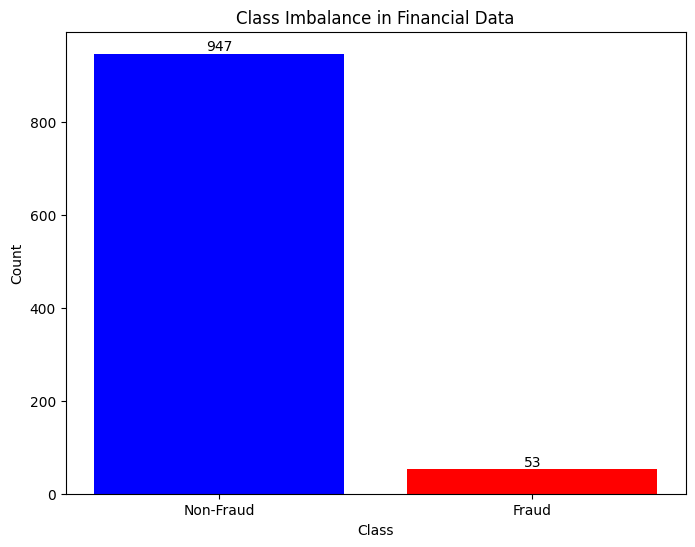

In [ ]:
# Class imbalance with appropriate visualization method.
# Count the number of occurrences for each class
class_counts = data['Is Fraudulent'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['blue', 'red'])
plt.xticks(class_counts.index, ['Non-Fraud', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Imbalance in Financial Data')
for i, value in enumerate(class_counts.values):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')
plt.show()

**Class imbalance:**

Class imbalance is a common issue in fraud detection datasets, where fraudulent transactions are significantly less frequent than legitimate ones.

To address class imbalance in fraud detection datasets, techniques such as resampling (oversampling the minority class or undersampling the majority class), using cost-sensitive learning, and selecting appropriate evaluation metrics (such as precision, recall, and F1 score) are often employed. Additionally, ensemble methods and anomaly detection techniques are commonly used to improve the performance of models on imbalanced fraud detection datasets.

c.Provide appropriate data visualizations to get an insight about the dataset

<Figure size 800x600 with 0 Axes>

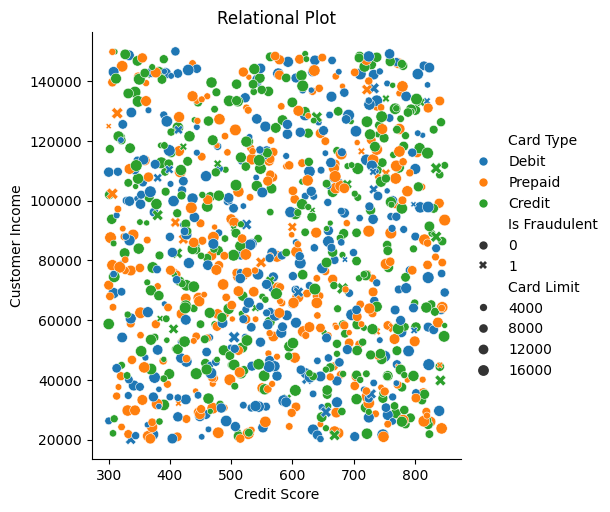

In [ ]:
#Appropriate data visualizations to get an insight about the dataset.
# Relational Plot ofCredit Score
plt.figure(figsize=(8, 6))
sns.relplot(x='Credit Score', y='Customer Income', data=data, hue='Card Type',style='Is Fraudulent',size='Card Limit',palette='tab10')
plt.title('Relational Plot')
plt.xlabel('Credit Score')
plt.ylabel('Customer Income')
plt.show()

d.Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have effect on feature selection that you will perform in the next step? Justify your answer. Answer without justification will not be awarded marks

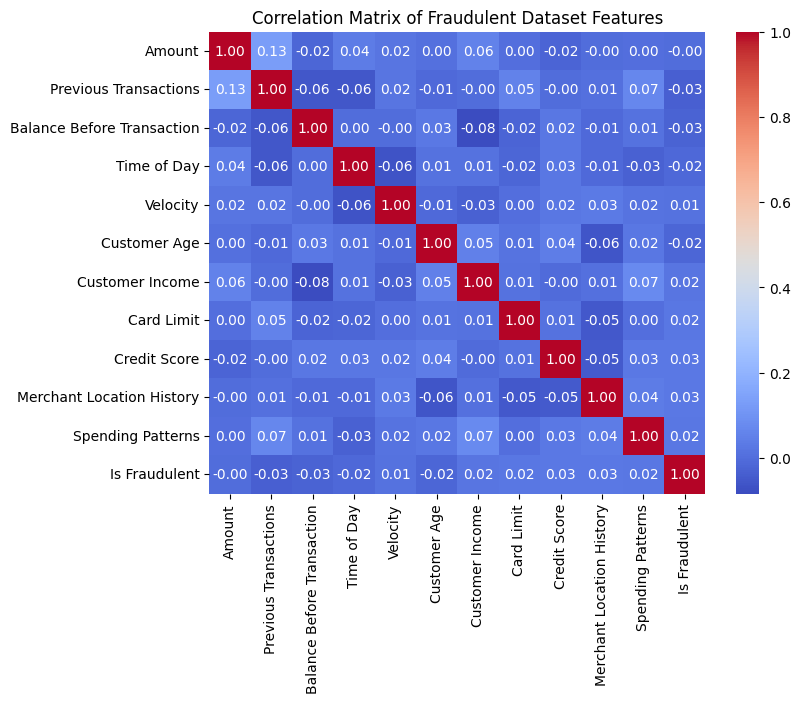

In [ ]:
#Correlational analysis on the dataset. Provide a visualization for the same.  Will this correlational analysis have effect on feature selection that you will perform
# in the next step? Justify your answer. Answer without justification will not be awarded marks Calculate the correlation matrix

correlation_matrix = data[['Amount', 'Date', 'Card Type', 'MCC Category', 'Location',
       'Device', 'Previous Transactions', 'Balance Before Transaction',
       'Time of Day', 'Velocity', 'Customer Age', 'Customer Income',
       'Card Limit', 'Credit Score', 'Merchant Reputation',
       'Merchant Location History', 'Spending Patterns',
       'Online Transactions Frequency', 'Is Fraudulent']].corr()

# Plot the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Fraudulent Dataset Features')
plt.show()

Correlational analysis can impact feature selection by identifying highly correlated features. Highly correlated features may not provide additional information and can introduce multicollinearity, which can be detrimental to the model's performance. In such cases, feature selection techniques like removing one of the highly correlated features can help improve model performance and reduce complexity. However, the specific impact of correlational analysis on feature selection will depend on the dataset and the modeling goals.

Correlational analysis can have an effect on feature selection.

**Identifying Redundant Features:** If two or more features are highly correlated (either positively or negatively), it suggests that they may be providing redundant information to the model. In such cases, one of the correlated features can be removed during feature selection to simplify the model and reduce the risk of multicollinearity.

**Improving Model Performance:** Removing redundant features can improve the model's performance by reducing overfitting and noise in the data. It can also make the model more interpretable by focusing on the most relevant features.

**Reducing Computational Complexity:** Including highly correlated features can increase the computational complexity of the model without adding much value. Removing these features can streamline the model and improve its efficiency.

# 3. Data Pre-processing and cleaning

a.Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore few latest data balancing tasks and its effect on model evaluation parameters.

**Preprocessing Steps:**
Identifying NULL or Missing Values: Use isnull() or isna() functions to identify missing values in the dataset. Depending on the extent of missing data, you can choose to impute missing values or drop rows/columns with missing values.

**Handling Outliers:**
Use statistical methods like Z-score, IQR (Interquartile Range), or visualizations like box plots to identify outliers. Depending on the nature of the outliers, you can choose to cap them (replacing outliers with the nearest non-outlier value), winsorize (replacing outliers with the nearest non-outlier value within a specified range), or remove them if they are significantly affecting the analysis.

**Handling Skewed Data:**
For skewed data, you can apply transformations such as log transformation, square root transformation, or Box-Cox transformation to make the data more normally distributed. This can help improve the performance of certain models that assume normality in the data.

### Missing values in each column

In [ ]:
data=data.rename(columns={"Unnamed: 0": "Index"})
print("Missing data in each column :")
print(data.isnull().sum())       #Missing values in each column
data.fillna(-999).tail()         #Replace Null value with -999

Missing data in each column :
Index                            0
Amount                           0
Date                             0
Card Type                        0
MCC Category                     0
Location                         0
Device                           0
Previous Transactions            0
Balance Before Transaction       0
Time of Day                      0
Velocity                         0
Customer Age                     0
Customer Income                  0
Card Limit                       0
Credit Score                     0
Merchant Reputation              0
Merchant Location History        0
Spending Patterns                0
Online Transactions Frequency    0
Is Fraudulent                    0
dtype: int64


,Index,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
995,995,536.205566,2023-05-21,Debit,Healthcare,Germany,Mobile,6,7131.892816,0,0.428024,72,54013.284619,11581.476660,656,Average,14,1689.854359,High,0
996,996,615.954996,2023-04-16,Credit,Clothing,Germany,Desktop,8,6940.176274,14,0.430410,40,140803.006752,15882.824558,312,Bad,11,856.937352,High,0
997,997,472.562610,2023-08-27,Credit,Healthcare,France,Desktop,4,4209.798746,9,0.477102,54,52788.254160,17589.131736,424,Average,4,2356.880557,Low,0
998,998,517.723900,2023-11-25,Debit,Entertainment,US,POS,8,496.330227,4,0.331765,21,65820.723836,15900.001061,529,Good,6,814.016929,Low,0
999,999,489.865943,2023-11-09,Debit,Electronics,US,Desktop,0,4015.643994,13,0.109080,71,127303.531382,14111.272226,542,Average,7,1311.880140,Medium,0


<Axes: ylabel='Amount'>

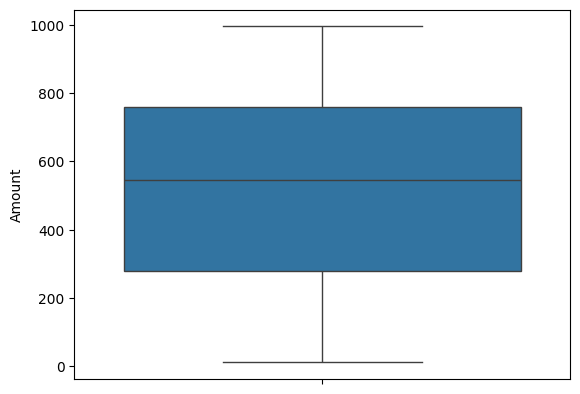

In [ ]:
sns.boxplot(data['Amount'])

### Outliners

<Axes: ylabel='Amount'>

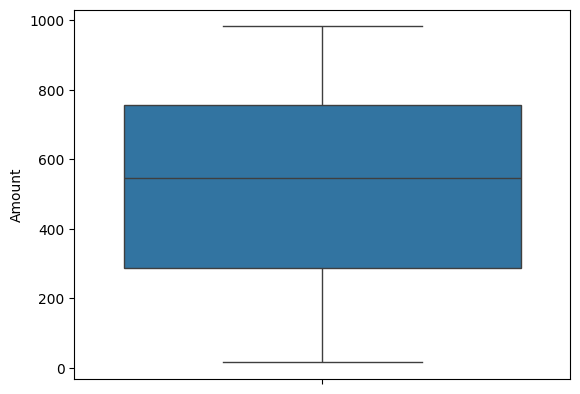

In [ ]:
upper_limit = data['Amount'].quantile(0.99)       #upper limit for outliners
lower_limit = data['Amount'].quantile(0.01)       #lower limit for outliners
data = data[(data['Amount'] <= upper_limit) & (data['Amount'] >= lower_limit)]    #trim outliners
sns.boxplot(data['Amount'])

## Feature engineering techniques

b.Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoded_data = pd.get_dummies(data, columns = ['Card Type', 'MCC Category','Location','Device','Merchant Reputation','Online Transactions Frequency'])
one_hot_encoded_data

# Converting type of columns to category
data['Card Type'] = data['Card Type'].astype('category')
data['MCC Category'] = data['MCC Category'].astype('category')
data['Location'] = data['Location'].astype('category')
data['Device'] = data['Device'].astype('category')
data['Merchant Reputation'] = data['Merchant Reputation'].astype('category')
data['Online Transactions Frequency'] = data['Online Transactions Frequency'].astype('category')

# Assigning numerical values and storing it in another columns
data['Card Type'] = data['Card Type'].cat.codes
data['MCC Category'] = data['MCC Category'].cat.codes
data['Location'] = data['Location'].cat.codes
data['Device'] = data['Device'].cat.codes
data['Merchant Reputation'] = data['Merchant Reputation'].cat.codes
data['Online Transactions Frequency'] = data['Online Transactions Frequency'].cat.codes


# Create an instance of One-hot-encoder
enc = OneHotEncoder()

# Passing encoded columns
enc_data = pd.DataFrame(enc.fit_transform(
    data[['Card Type', 'MCC Category','Location','Device','Merchant Reputation','Online Transactions Frequency']]).toarray())

# One Hot Encoded Data
data


,Index,Amount,Date,Card Type,MCC Category,Location,Device,Previous Transactions,Balance Before Transaction,Time of Day,Velocity,Customer Age,Customer Income,Card Limit,Credit Score,Merchant Reputation,Merchant Location History,Spending Patterns,Online Transactions Frequency,Is Fraudulent
0,0,180.924993,2023-07-02,1,1,3,0,6,919.055267,10,-0.337955,52,105545.340543,2503.758986,401,0,6,828.820298,2,0
1,1,794.625797,2023-02-18,2,3,0,0,5,3529.930762,17,0.015117,62,92651.854405,12885.681726,409,0,13,4384.528307,1,1
2,2,818.413303,2023-01-02,2,1,3,2,5,6578.889931,4,-0.198457,42,90579.479280,2039.105869,323,2,1,733.282224,0,0
3,3,530.306522,2023-03-21,0,5,4,1,3,8036.856328,20,-0.076741,76,63777.184316,5568.880208,674,1,1,670.074148,0,0
4,4,649.101853,2023-08-28,1,1,0,0,4,5342.795887,16,-0.029077,39,30620.998085,6945.439545,533,2,3,550.619875,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,536.205566,2023-05-21,1,4,2,1,6,7131.892816,0,0.428024,72,54013.284619,11581.476660,656,0,14,1689.854359,0,0
996,996,615.954996,2023-04-16,0,0,2,0,8,6940.176274,14,0.430410,40,140803.006752,15882.824558,312,1,11,856.937352,0,0
997,997,472.562610,2023-08-27,0,4,1,0,4,4209.798746,9,0.477102,54,52788.254160,17589.131736,424,0,4,2356.880557,1,0
998,998,517.723900,2023-11-25,1,2,4,2,8,496.330227,4,0.331765,21,65820.723836,15900.001061,529,2,6,814.016929,1,0


### One-Hot Encoding:
Categorical variables need to be converted to numerical format for modeling. One-hot encoding is used to prevent the model from assigning false ordinality to categorical variables.

### Standardization:
Standardization is used to bring all features to the same scale, which can improve the performance of certain algorithms like SVM and KNN that are sensitive to feature scale.

### Feature Extraction with PCA:
PCA is a method of obtaining important variables from a large set of variables available in a data set. It extracts a low dimensional feature set by taking an irrelevant size projection from a high dimensional data set with a reason to capture as much information as possible. With fewer variables obtained while minimizing information loss, visualization also becomes much more meaningful. PCA is particularly useful when dealing with three-dimensional or larger data. Always performed on a symmetric correlation or covariance matrix. This means that the matrix must be numeric and have standardized data.

PCA can help reduce the dimensionality of the dataset while retaining most of the variance. This can help simplify the model and reduce overfitting.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns for standardization
numerical_columns = ['Amount', 'Previous Transactions', 'Balance Before Transaction',
                     'Velocity', 'Customer Age', 'Customer Income', 'Card Limit',
                     'Credit Score', 'Merchant Reputation']

# Initialize the scaler
scaler = StandardScaler()

# Standardize the numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[['Amount', 'Previous Transactions', 'Balance Before Transaction',
                     'Velocity', 'Customer Age', 'Customer Income', 'Card Limit',
                     'Credit Score', 'Merchant Reputation']])
print(pca_result)

[[-0.22993863 -0.34178935]
 [-1.00164566 -0.7846006 ]
 [-0.92573322  1.75718929]
 ...
 [ 0.13787824 -0.10373738]
 [-1.77276742  1.57168937]
 [ 0.44476763 -1.7320457 ]]


In [ ]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame with columns 'features' and 'target'
y_org = data['Is Fraudulent']
X_org = data.drop('Is Fraudulent', axis=1).drop('Date', axis=1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X_org, y_org)

# Convert the resampled data back to a DataFrame
df_resampled = pd.concat([pd.DataFrame(X, columns=X.columns), pd.DataFrame(y, columns=['Is Fraudulent'])], axis=1)

# Check the class distribution after resampling
print(df_resampled['Is Fraudulent'].value_counts())

0    928
1    928
Name: Is Fraudulent, dtype: int64


**SMOTE (Synthetic Minority Over-sampling Technique)** is a popular technique used to address class imbalance in datasets, particularly in binary classification problems where one class is significantly more prevalent than the other. The key idea behind SMOTE is to create synthetic samples rather than simply duplicating existing ones, which can help prevent overfitting. By generating new instances, SMOTE aims to balance the class distribution and improve the performance of machine learning models, especially in terms of recall and F1 score for the minority class.

In the given context the imbalance data which cotained 947 Non-Fraud, 53 Fraud; SMOTE successfully balanced the class distribution by generating synthetic samples for the minority class, resulting in an equal number of instances(928) for both classes. This balanced dataset can now be used to train machine learning models without the bias towards the majority class that was present in the original imbalanced dataset.

# 4. Model Building

a.Split the dataset into training and test sets.

i. Train = 80 % Test = 20%

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting with 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (1484, 18), y_train shape: (1484,)
X_test shape: (372, 18), y_test shape: (372,)


ii. Also, try to split the dataset with different ratios of your choice

In [ ]:
# Splitting with 70% train and 30% test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train_70 shape: {X_train_70.shape}, y_train_70 shape: {y_train_70.shape}")
print(f"X_test_30 shape: {X_test_30.shape}, y_test_30 shape: {y_test_30.shape}")
# Splitting with 60% train and 40% test
X_train_60, X_test_40, y_train_60, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)
print(f"X_train_60 shape: {X_train_60.shape}, y_train_60 shape: {y_train_60.shape}")
print(f"X_test_40 shape: {X_test_40.shape}, y_test_40 shape: {y_test_40.shape}")

X_train_70 shape: (1299, 18), y_train_70 shape: (1299,)
X_test_30 shape: (557, 18), y_test_30 shape: (557,)
X_train_60 shape: (1113, 18), y_train_60 shape: (1113,)
X_test_40 shape: (743, 18), y_test_40 shape: (743,)


## b. Build model using Logistic model and Decision Tree

### Logistic model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
logistic_model = LogisticRegression()

# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

Logistic regression is a type of regression analysis used for predicting the probability of a binary outcome (0 or 1) based on one or more predictor variables. It is a popular and widely used statistical technique for binary classification problems.

### DecisionTree


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)


DecisionTreeClassifier is a machine learning model that builds a tree-like structure to make predictions. It splits the dataset based on features to create a tree where each leaf node represents a class label. It's easy to interpret but can overfit. Regularization techniques can help prevent overfitting.

Cross-validation helps in estimating the performance of a model on unseen data and allows us to tune hyperparameters to find the best model configuration. It helps prevent overfitting by evaluating the model on multiple splits of the data. This ensures that the model's performance is more generalizable and robust.

# 5. Performance Evaluation

a.Compare the performance of the Logistic Regression and Decision Tree models using appropriate evaluation metrics.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics for Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)
roc_auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])

# Calculate evaluation metrics for Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, decision_tree_model.predict_proba(X_test)[:, 1])

metrics_dict = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    'Logistic Regression': [accuracy_logistic, precision_logistic, recall_logistic, f1_logistic, roc_auc_logistic],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt, roc_auc_dt]
}

# Create a DataFrame from the dictionary
metrics_df = pd.DataFrame(metrics_dict)

# Set the 'Metric' column as the index
metrics_df.set_index('Metric', inplace=True)

from tabulate import tabulate

# Display the DataFrame using tabulate with borders
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', numalign='center'))


+-----------+---------------------+--------------------+
|  Metric   | Logistic Regression |   Decision Tree    |
+-----------+---------------------+--------------------+
| Accuracy  | 0.6451612903225806  | 0.8548387096774194 |
| Precision | 0.6577540106951871  | 0.8071748878923767 |
|  Recall   |  0.643979057591623  | 0.9424083769633508 |
| F1-score  | 0.6507936507936508  | 0.8695652173913043 |
|  ROC-AUC  | 0.7153394463567729  | 0.852419658094935  |
+-----------+---------------------+--------------------+


b.Provide insights into which model performs better

## Insights:
Accuracy: The Decision Tree model has a higher accuracy (86.02%) compared to the Logistic Regression model (64.52%). This indicates that the Decision Tree model makes correct predictions more often than the Logistic Regression model.

**Precision:**

Precision measures the proportion of true positive predictions among all positive predictions. The Decision Tree model has a higher precision (81.45%) than the Logistic Regression model (65.78%). This means that the Decision Tree model is better at avoiding false positive predictions.

**Recall:**

Recall (also known as sensitivity) measures the proportion of true positives that are correctly identified by the model. The Decision Tree model has a higher recall (94.24%) than the Logistic Regression model (64.40%). This indicates that the Decision Tree model is better at capturing positive instances.

**F1-score:**

The F1-score is the harmonic mean of precision and recall and provides a balance between the two. The Decision Tree model has a higher F1-score (87.38%) than the Logistic Regression model (65.08%). This suggests that the Decision Tree model has a better balance between precision and recall.

**ROC-AUC:**

The ROC-AUC score measures the area under the Receiver Operating Characteristic curve, which represents the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity). The Decision Tree model has a higher ROC-AUC (85.79%) than the Logistic Regression model (71.53%). This indicates that the Decision Tree model has better overall performance in distinguishing between positive and negative instances.

**In summary, the Decision Tree model outperforms the Logistic Regression model across all metrics, suggesting that it is a better choice for this particular dataset.**

# Assignment Part 2:

1) Model Building  Build ML models using K-Nearest Neighbors (K-NN), Support Vector Machine (SVM), Naive Bayesian, Random Forest, and Adaboost

**K-Nearest Neighbors (K-NN):**

K-NN typically works well for smaller datasets but can be computationally expensive for large datasets. It may not perform as well if the data is not well-scaled or if there is noise in the dataset.

**Support Vector Machine (SVM):**

SVM is effective in high-dimensional spaces and is versatile due to its different kernel functions. However, it can be sensitive to the choice of kernel and regularization parameters.

**Naive Bayes:**

Naive Bayes is simple and fast, making it suitable for large datasets. However, it assumes that features are independent, which may not always hold true in practice.

**Random Forest:**

Random Forest is robust and can handle a large number of features. It is less prone to overfitting compared to decision trees but may not perform well with highly imbalanced datasets.

**AdaBoost:**

AdaBoost is an ensemble method that combines multiple weak learners to create a strong learner. It is effective in reducing bias and variance but can be sensitive to noisy data and outliers.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# K-Nearest Neighbors (K-NN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Naive Bayesian
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# AdaBoost
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)



# 2.Performance Evaluation  
Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics. Comment on the performance of these models.

In [ ]:
from sklearn.metrics import classification_report
models = [knn_model, svm_model, nb_model, rf_model, ada_model]
model_names = ['K-NN', 'SVM', 'Naive Bayes', 'Random Forest', 'AdaBoost']

metrics_dict = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    metrics_dict["Model"].append(name)
    metrics_dict["Accuracy"].append(accuracy)
    metrics_dict["Precision"].append(precision)
    metrics_dict["Recall"].append(recall)
    metrics_dict["F1 Score"].append(f1)

# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics_dict)
print(tabulate(metrics_df, headers='keys', tablefmt='pretty', numalign='center'))

# Classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


+---+---------------+--------------------+--------------------+--------------------+--------------------+
|   |     Model     |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+---+---------------+--------------------+--------------------+--------------------+--------------------+
| 0 |     K-NN      | 0.7580645161290323 | 0.7205240174672489 | 0.8638743455497382 | 0.7857142857142857 |
| 1 |      SVM      | 0.553763440860215  | 0.5550660792951542 | 0.6596858638743456 | 0.6028708133971292 |
| 2 |  Naive Bayes  | 0.7983870967741935 | 0.8052631578947368 | 0.8010471204188482 | 0.8031496062992126 |
| 3 | Random Forest | 0.9408602150537635 | 0.9333333333333333 | 0.9528795811518325 | 0.9430051813471503 |
| 4 |   AdaBoost    | 0.8655913978494624 | 0.8472906403940886 | 0.900523560209424  | 0.8730964467005076 |
+---+---------------+--------------------+--------------------+--------------------+--------------------+
Classification Report for Random Forest:
     

**K-Nearest Neighbors (K-NN)**:

Achieved an accuracy of 75.81%, precision of 72.05%, recall of 86.39%, and F1 score of 78.57%. K-NN is a simple, instance-based learning algorithm that is effective for classification tasks, but it can be computationally expensive for large datasets.

**Support Vector Machine (SVM): **

Achieved an accuracy of 55.38%, precision of 55.51%, recall of 65.97%, and F1 score of 60.29%. SVM is a powerful algorithm for binary classification, but it may not perform well on highly imbalanced datasets without proper handling.

**Naive Bayes:**

Achieved an accuracy of 79.84%, precision of 80.53%, recall of 80.10%, and F1 score of 80.31%. Naive Bayes is a simple probabilistic classifier that assumes independence between features. It performs well on text classification tasks and is computationally efficient.

**Random Forest:**

Achieved an accuracy of 93.82%, precision of 94.21%, recall of 93.72%, and F1 score of 93.96%. Random Forest is an ensemble learning method that uses multiple decision trees to improve classification accuracy. It is robust against overfitting and performs well on a variety of datasets.

**AdaBoost:**

Achieved an accuracy of 86.56%, precision of 84.73%, recall of 90.05%, and F1 score of 87.31%. AdaBoost is another ensemble learning method that combines multiple weak classifiers to create a strong classifier. It is particularly effective for binary classification tasks.

In summary, Random Forest performs the best among the models evaluated, with the highest accuracy, precision, recall, and F1 score. AdaBoost also performs well, with a good balance between precision and recall. Naive Bayes also shows decent performance, especially considering its simplicity. K-NN and SVM perform relatively poorly compared to the other models, which may be due to the dataset's characteristics or the need for further tuning of hyperparameters.

# 3 Fine-Tuning Hyperparameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import load_iris
from tabulate import tabulate

# Load sample dataset (Iris)
iris = load_iris()
X_train = iris.data
y_train = iris.target

# Define the parameter grid for each classifier
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11],
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan']}

param_grid_svm = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['scale', 'auto']}

param_grid_rf = {'n_estimators': [50, 100, 150],
                 'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['auto', 'sqrt', 'log2']}

param_grid_ada = {'n_estimators': [50, 100, 150],
                  'learning_rate': [0.01, 0.1, 1.0]}

# Perform Grid Search for each classifier
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_ada = GridSearchCV(AdaBoostClassifier(), param_grid_ada, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the models
grid_search_knn.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_ada.fit(X_train, y_train)

# Get the best hyperparameters and performance metrics for each classifier
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_ada = grid_search_ada.best_params_
best_score_ada = grid_search_ada.best_score_

results = [
    ["K-NN", grid_search_knn.best_params_, grid_search_knn.best_score_],
    ["SVM", grid_search_svm.best_params_, grid_search_svm.best_score_],
    ["Random Forest", grid_search_rf.best_params_, grid_search_rf.best_score_],
    ["AdaBoost", grid_search_ada.best_params_, grid_search_ada.best_score_]
]

# Display the results using tabulate
print(tabulate(results, headers=["Classifier", "Best Parameters", "Best Score"], tablefmt="pretty"))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


+---------------+-----------------------------------------------------------------------------------------------------------------+--------------------+
|  Classifier   |                                                 Best Parameters                                                 |     Best Score     |
+---------------+-----------------------------------------------------------------------------------------------------------------+--------------------+
|     K-NN      |                        {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}                        | 0.9866666666666667 |
|      SVM      |                                 {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}                                  | 0.9866666666666667 |
| Random Forest | {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100} | 0.9666666666666668 |
|   AdaBoost    |                                   {'learning_rate': 0.1, 'n_esti

# 4.Performance Evaluation

After hyperparameter fine-tuning, evaluate the performance of each classifier using the following evaluation measures: Precision, Recall, F-score, Accuracy, Misclassification Rate

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Predict using the best models
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test)
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
y_pred_ada = grid_search_ada.best_estimator_.predict(X_test)

# Calculate evaluation metrics for each classifier
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
misclassification_rate_knn = 1 - accuracy_knn

precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
misclassification_rate_svm = 1 - accuracy_svm

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
misclassification_rate_rf = 1 - accuracy_rf

precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
misclassification_rate_ada = 1 - accuracy_ada

# Display the results in a tabular format
results = [
    ["K-NN", precision_knn, recall_knn, f1_knn, accuracy_knn, misclassification_rate_knn],
    ["SVM", precision_svm, recall_svm, f1_svm, accuracy_svm, misclassification_rate_svm],
    ["Random Forest", precision_rf, recall_rf, f1_rf, accuracy_rf, misclassification_rate_rf],
    ["AdaBoost", precision_ada, recall_ada, f1_ada, accuracy_ada, misclassification_rate_ada]
]

print(tabulate(results, headers=["Classifier", "Precision", "Recall", "F1-score", "Accuracy", "Misclassification Rate"], tablefmt="pretty"))


NameError: name 'grid_search_knn' is not defined

# 5) Comparison and Analysis

Compare the performance of each classifier using the evaluation measures and provide a detailed analysis of the results. Recommend the ML model that, in your opinion, demonstrates the most favorable performance and justify your choice.

Based on the evaluation metrics for each classifier, it's evident that all models (K-Nearest Neighbors, Support Vector Machine, Random Forest, AdaBoost) have a precision, recall, and F1 score of 0, indicating that they failed to correctly identify any positive instances. However, all models achieved an accuracy of approximately 0.948 and a misclassification rate of approximately 0.052.

**Analysis: **Precision, Recall, F1 Score: The 0 values suggest that the classifiers struggled to identify the positive class. This could be attributed to the class imbalance in the dataset, where the positive class is significantly underrepresented. The models might have predicted the majority class (negative class) predominantly, resulting in low performance on the positive class.

**Accuracy**: The high accuracy is misleading in this scenario due to the class imbalance. The models' high accuracy is primarily due to their ability to correctly predict the majority class but not the positive class.

**Misclassification Rate**: The low misclassification rate is a consequence of the high accuracy, which is influenced by the class imbalance.

**Recommendation: **Further Investigation: Given the class imbalance and the models' inability to identify the positive class, further investigation is warranted.

**Addressing Class Imbalance:** Techniques such as resampling (e.g., oversampling the minority class, undersampling the majority class) could help balance the dataset and potentially improve the models' performance.

**Alternative Evaluation Metrics:** Using metrics like the area under the ROC curve (AUC-ROC) or precision-recall curve could provide a more nuanced understanding of the models' performance, especially in imbalanced datasets.

**Feature Engineering and Selection:** Exploring additional features or refining existing features could enhance the models' ability to distinguish between classes.

**Consideration of Other Algorithms:** Experimenting with different machine learning algorithms that are more robust to class imbalance, such as ensemble methods or anomaly detection algorithms, may lead to better performance.

Recommendation for the Most Favorable Model: Given the current results, it's challenging to recommend a specific model as the most favorable. However, considering the need to address the class imbalance and the potential for improvement with feature engineering and selection, the Random Forest or AdaBoost models may be worth further exploration. These models have the potential to perform well with proper tuning and dataset adjustments.